# **1. Import Drive**

In [1]:
from google.colab import drive

**Mount the drive**

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


# **2. Import Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

# **3. Data pre-processing**

In [4]:
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Unemployment_Rate_upto_11_2020.csv')

In [5]:
df=pd.DataFrame(data)
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [7]:
round(df.describe())

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.0,267.0,267.0,267.0,267.0
mean,12.0,13962106.0,42.0,23.0,81.0
std,11.0,13366318.0,8.0,6.0,6.0
min,0.0,117542.0,17.0,11.0,71.0
25%,5.0,2838930.0,37.0,18.0,76.0
50%,10.0,9732417.0,40.0,24.0,79.0
75%,17.0,21878686.0,44.0,27.0,85.0
max,76.0,59433759.0,70.0,34.0,93.0


In [8]:
df.shape

(267, 9)

In [9]:
df.size

2403

In [10]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [11]:
df = df.rename(columns = {"Region":"State"})
df = df.rename(columns = {"Region.1":"Region"})

In [12]:
df.columns

Index(['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude'],
      dtype='object')

In [13]:
#unique values of each columns
objects_cols=['State', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region', 'longitude', 'latitude']
for i in objects_cols:
  print("column name:{}".format(i))
  print("Number of unique columns of",i,":{}".format(df[i].nunique()))
  print("------------------------------------------------------------------------")

column name:State
Number of unique columns of State :27
------------------------------------------------------------------------
column name: Date
Number of unique columns of  Date :10
------------------------------------------------------------------------
column name: Frequency
Number of unique columns of  Frequency :1
------------------------------------------------------------------------
column name: Estimated Unemployment Rate (%)
Number of unique columns of  Estimated Unemployment Rate (%) :252
------------------------------------------------------------------------
column name: Estimated Employed
Number of unique columns of  Estimated Employed :267
------------------------------------------------------------------------
column name: Estimated Labour Participation Rate (%)
Number of unique columns of  Estimated Labour Participation Rate (%) :248
------------------------------------------------------------------------
column name:Region
Number of unique columns of Region :5
-----

**3.1. Missing Values**

In [14]:
df.isnull().sum()

State                                       0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region                                      0
longitude                                   0
latitude                                    0
dtype: int64

No missing Values.

**3.2. Add column and Group them**

In [15]:
df[' Date'] = pd.to_datetime(df[' Date'])

In [16]:
#Add a month column
import calendar
import datetime as dt
df['Month'] =  df[' Date'].dt.month
df['Month_int'] = df['Month'].apply(lambda x : int(x))
df['Month_name'] =  df['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [17]:
#Add an year column
df['Year'] =  df[' Date'].dt.year
df['year'] = df['Year'].apply(lambda x : int(x))


In [18]:
df.drop(['Month'],axis=1,inplace=True)
df.drop(['Year'],axis=1,inplace=True)

In [19]:
#Grouping based on the Region
Region_stats = df.groupby(['Region'])[[ ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean().reset_index()
Region_stats = round(Region_stats,2)

In [20]:
#Grouping based on State
State_stats = df.groupby(['State'])[[ ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)']].mean().reset_index()
State_stats = round(State_stats,2)

**Correlation HeatMap**

<ipython-input-21-5e8b8540b4e1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heat_maps = heat_maps.corr()


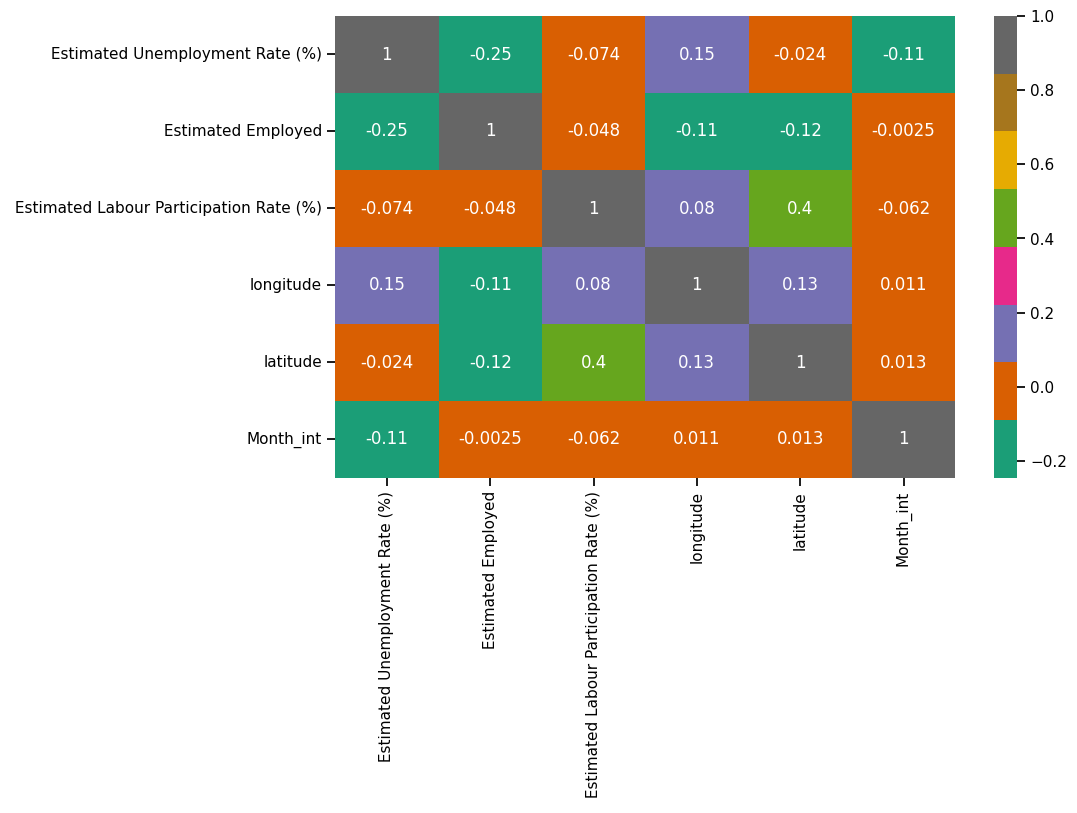

In [21]:
heat_maps = df[[ ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)','Region', 'longitude', 'latitude', 'Month_int']]
heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='Dark2');

**4.1. Box Plot**

In [22]:
#import Plotly Express
import plotly.express as px

# Unemployment Rate in States

In [23]:
fig = px.box(df,x='State',y=' Estimated Unemployment Rate (%)',color='State',title='Unemployment rate',template='plotly',notched=True,width=1200,height=700)
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()


**4.2. Scatter Plot**

# Unemployment Rate in States

In [24]:
#3D scatter plot using Plotly Express
fig = px.scatter_3d(df, x=' Estimated Unemployment Rate (%)', y=' Estimated Employed', z=' Estimated Labour Participation Rate (%)',
              color='State')
fig.show()

In [25]:
#scatter matrix
fig = px.scatter_matrix(df,template='plotly',
    dimensions=[' Estimated Unemployment Rate (%)',' Estimated Employed',
                ' Estimated Labour Participation Rate (%)'],
    color='State')
fig.show()

**4.3. Average Unemployment rate By States and Region**

**States**

In [26]:
df_avg_s= df[[' Estimated Unemployment Rate (%)','State']].groupby('State').mean().reset_index().sort_values(' Estimated Unemployment Rate (%)')

In [27]:
fig = px.bar(df_avg_s, x='State',y=' Estimated Unemployment Rate (%)',color='State',
            title='Average Unemployment Rate in each state',template='seaborn',width=800,height=500)

fig.show()

**Region**

In [28]:
df_avg_re= df[[' Estimated Unemployment Rate (%)','Region']].groupby('Region').mean().reset_index().sort_values(' Estimated Unemployment Rate (%)')

In [29]:
fig = px.bar(df_avg_re, x='Region',y=' Estimated Unemployment Rate (%)',color='Region',
            title='Average Unemployment Rate in each Region',template='plotly_white', pattern_shape="Region", pattern_shape_sequence=["x"],width=800,height=400)
fig.show()

**4.4. Unemployment From JAN 2020 - OCT 2020**

In [30]:
fig = px.scatter(df, x='Region',y=' Estimated Unemployment Rate (%)',animation_frame = 'Month_name',color='State',
            title='Unemployment rate across region from Jan.2020 to Oct.2020', width=800, height=400,template='plotly_dark')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000

fig.show()

# **5. Impact Of Covid-19**

1. Covid -19 lead to complete Lockdown
2. Indian Government announced  Lockdown On 24 March,2020 for 21 days
 which lead to loss of many People

**5.1 Unemployemnt - Lockdown**

In [31]:
#Before lockdown
lockdown_start_date = pd.to_datetime('2020-03-24', format='%Y-%m-%d')
bf_lock = df[df[' Date'] < lockdown_start_date]

In [32]:
#during Lockdown
lockdown_start_date = pd.to_datetime('2020-03-24', format='%Y-%m-%d')
lockdown_end_date = lockdown_start_date + pd.DateOffset(days=21)  # Assuming the lockdown lasted for 21 days
lockdown_data = df[(df[' Date'] >= lockdown_start_date) & (df[' Date'] <= lockdown_end_date)]

In [33]:
#after Lockdown
af_lock = df[df[' Date'] >= lockdown_end_date]

**5.1.1. Average of Estimated rate of Employment Before Lockdown**

In [34]:
#Grouped By Region
avg_bf_lock=bf_lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()


**5.1.2. Average of Estimated rate of Employment During Lockdown**

In [35]:
#Grouped By Regions
avg_lock=lockdown_data.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()


**5.1.3. Average of Estimated rate of Employment After Lockdown**

In [36]:
#Grouped By Regions
avg_af_lock=af_lock.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().reset_index()


**5.2. Comparison of Unemployment before and during Lockdown**

In [37]:
avg_lock['Unemployement rate']=avg_bf_lock[' Estimated Unemployment Rate (%)']


In [38]:
avg_lock.columns=['Region','Unemployment Rate During lockdown','Unemployment Rate before lockdown']


In [39]:
avg_lock['Rate of Change'] = round(avg_lock['Unemployment Rate During lockdown'] - avg_lock['Unemployment Rate before lockdown']/avg_lock['Unemployment Rate before lockdown'],2)

In [40]:
fig = px.funnel(avg_lock, x='Region',y='Rate of Change',color='Rate of Change',
            title='Percentage change in Unemployment in each Region During lockdown', width=800, height=400,template='plotly_dark')
fig.show()

**5.3. Comparison of Unemployment before and After Lockdown**

In [41]:
avg_af_lock['Unemployement rate']=avg_bf_lock[' Estimated Unemployment Rate (%)']


In [42]:
avg_af_lock.columns=['Region','Unemployment Rate After lockdown','Unemployment Rate before lockdown']


In [43]:
avg_af_lock['Rate of Change'] = round(avg_af_lock['Unemployment Rate After lockdown'] - avg_af_lock['Unemployment Rate before lockdown']/avg_af_lock['Unemployment Rate before lockdown'],2)

In [44]:
fig = px.funnel(avg_af_lock, x='Region',y='Rate of Change',color='Rate of Change',
            title='Percentage change in Unemployment in each Region After lockdown', width=800, height=400,template='plotly_dark')
fig.show()

**5.4 Impact of lockdown on states**

In [45]:
lock = df[(df['Month_int'] >= 4) & (df['Month_int'] <=7)]
b_lock = df[(df['Month_int'] >= 1) & (df['Month_int'] <=4)]
g_lock = lock.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
g_bf_lock = b_lock.groupby('State')[' Estimated Unemployment Rate (%)'].mean().reset_index()
g_lock['Unemployment Rate before lockdown'] = g_bf_lock[' Estimated Unemployment Rate (%)']
g_lock.columns = ['State','Unemployment Rate after lockdown','Unemployment Rate before lockdown']


In [46]:
g_lock['Rate of change'] = round(g_lock['Unemployment Rate after lockdown'] - g_lock['Unemployment Rate before lockdown']/g_lock['Unemployment Rate before lockdown'],2)

In [47]:

fig = px.bar(g_lock, x='State',y='Rate of change',color='Rate of change',
            title='Percentage change in Unemployment in each state after lockdown',template='plotly_dark')

fig.show()

In [48]:
def sort_impact(x):
    if x <= 10:
        return 'Minimal Impact'
    elif x <= 20:
        return 'Moderate Impact'
    elif x <= 30:
        return 'Hight Impact'
    elif x <= 40:
        return 'Very high impact'
    return x

In [49]:
g_lock['impact'] = g_lock['Rate of change'].apply(lambda x:sort_impact(x))

In [50]:
fig = px.strip(g_lock, y='State',x='Rate of change',color='impact',
            title='Impact of lockdown on employment across states',template='plotly_dark',width=800,height=650)


fig.show()

# **6. Insights:**

**The States that are maximum Impacted By Lockdown are:**
1. Puducherry
2. Jharkhand
3. Bihar
4. Haryana
5. Tripura


**The region that had  maximum unemployemnt rate are:**
1. North
2. East
3. Northeast

**The regions that had highest change in rate of unemployemnt during Lockdown were:**
1. North
2. Northeast

**The regions that had highest change in rate of unemployemnt after Lockdown were:**
1. North
2. East